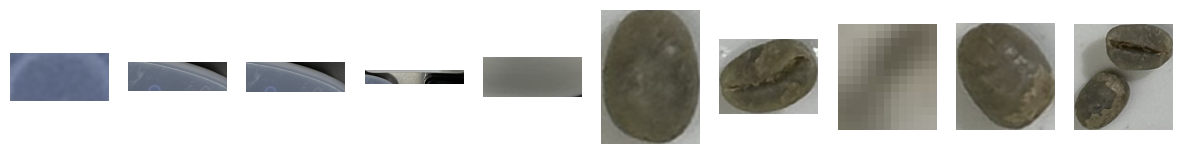

['corp/coffee_beans\\bean_0.jpg',
 'corp/coffee_beans\\bean_1.jpg',
 'corp/coffee_beans\\bean_2.jpg',
 'corp/coffee_beans\\bean_3.jpg',
 'corp/coffee_beans\\bean_4.jpg',
 'corp/coffee_beans\\bean_5.jpg',
 'corp/coffee_beans\\bean_6.jpg',
 'corp/coffee_beans\\bean_7.jpg',
 'corp/coffee_beans\\bean_8.jpg',
 'corp/coffee_beans\\bean_9.jpg',
 'corp/coffee_beans\\bean_10.jpg',
 'corp/coffee_beans\\bean_11.jpg',
 'corp/coffee_beans\\bean_12.jpg',
 'corp/coffee_beans\\bean_13.jpg',
 'corp/coffee_beans\\bean_14.jpg',
 'corp/coffee_beans\\bean_15.jpg',
 'corp/coffee_beans\\bean_16.jpg',
 'corp/coffee_beans\\bean_17.jpg',
 'corp/coffee_beans\\bean_18.jpg',
 'corp/coffee_beans\\bean_19.jpg',
 'corp/coffee_beans\\bean_20.jpg',
 'corp/coffee_beans\\bean_21.jpg',
 'corp/coffee_beans\\bean_22.jpg',
 'corp/coffee_beans\\bean_23.jpg',
 'corp/coffee_beans\\bean_24.jpg',
 'corp/coffee_beans\\bean_25.jpg',
 'corp/coffee_beans\\bean_26.jpg',
 'corp/coffee_beans\\bean_27.jpg',
 'corp/coffee_beans\\bean_28.j

In [1]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt

# 讀取圖片
image_path = "good_coffee_beans.jpeg"
image = cv2.imread(image_path)

# 轉換為灰階
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# 使用高斯模糊來降低噪聲
blurred = cv2.GaussianBlur(gray, (11, 11), 0)

# 二值化處理（使用 Otsu 門檻處理）
_, binary = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# 找出輪廓
contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# 建立一個資料夾來存放裁切的咖啡豆圖片
output_folder = "corp/coffee_beans"
os.makedirs(output_folder, exist_ok=True)

# 繪製輪廓並裁切每顆咖啡豆
bean_images = []
for i, contour in enumerate(contours):
    x, y, w, h = cv2.boundingRect(contour)
    if w > 10 and h > 10:  # 過濾掉過小的雜訊
        bean_crop = image[y:y+h, x:x+w]
        bean_images.append(bean_crop)
        bean_path = os.path.join(output_folder, f"bean_{i}.jpg")
        cv2.imwrite(bean_path, bean_crop)

# 顯示部分裁切結果
num_display = min(10, len(bean_images))  # 顯示最多 10 顆
fig, axes = plt.subplots(1, num_display, figsize=(15, 5))
for idx in range(num_display):
    axes[idx].imshow(cv2.cvtColor(bean_images[idx], cv2.COLOR_BGR2RGB))
    axes[idx].axis("off")
plt.show()

# 回傳所有裁切後的圖片路徑
bean_paths = [os.path.join(output_folder, f"bean_{i}.jpg") for i in range(len(bean_images))]
bean_paths
